In [11]:
load("https://bitbucket.org/malb/lwe-estimator/raw/HEAD/estimator.py")
possible_attacks = ["mitm", "usvp", "dec", "dual", "bkw", "arora-gb"]

In [12]:
def return_min(rows):
    no_skips = []
    
    for x in rows:
        if x != "skipped":
            no_skips.append(float(x))
            
    return min(no_skips)

def test_parameters(n, q, stddev, alpha):
    #this just returns the results with just the bit security rather than the whole result
    result = estimate_lwe(n, alpha, q, reduction_cost_model=BKZ.sieve)
    #rows = [["n", "q", "alpha", "stddev", "mitm", "usvp", "dec", "dual", "bkw", "arora-gb"], [n, q, alpha, stddev]]
    rows = [n, q, alpha, stddev]
    
    for x in possible_attacks:
        #current = rows[1]
        if x in result:
            string_version = str(result[x])
            if string_version[0:7] != "rop: 2^":
                rows.append("error")
            else:
                comma = string_version.index(",")
                rows.append(string_version[7:comma])    
        else:           
            rows.append("skipped")
    
    rows.append(return_min(rows[4:]))
    return rows

def change_parameters(n, q, stddev): #sigma is stddev
    rows = [["n", "q", "alpha", "sigma", "mitm", "usvp", "dec", "dual", "bkw", "arora-gb", "final"]]
    
    for x in stddev:
        alpha = alphaf(sigmaf(x), q, sigma_is_stddev=False) 
        #if sigma_is_stddev=true then alphaf will perform sigmaf() on first parameter but has already been done
        result = test_parameters(n, q, x, alpha)
        #type(result)
        rows.append(result)
    
    return rows

def get_interval(sigma):
    interval = 0.05
    multipler = int(1/interval)
    start_sigma = 1*multipler
    end_sigma = int(sigma*multipler)
    sigma_list = [x*interval for x in range(start_sigma, end_sigma)]
    sigma_list.append(sigma)
    
    return sigma_list

######

#regualar/ latex table

def index_list(entered_list, index):
    new_list = []
    for i in range(len(entered_list)):
        new_column = [entered_list[i][x] for x in index]
        new_list.append(new_column)#
    
    return new_list


def print_table(result, bool, index):
    result_indexed = index_list(result, index)
    if bool==True:       
        return latex(table(result_indexed, header_row=True))
    else:
        return table(result_indexed, header_row=True)

#below is for making graphs
def get_tuple(input_list, x_input, y_input):
    index_x = input_list[0].index(x_input)
    index_y = input_list[0].index(y_input)

    x_axis = [x[index_x] for x in input_list[1:]]
    y_axis = [x[index_y] for x in input_list[1:]]
    
    graph_list = list(zip(x_axis, y_axis))
    return graph_list
    
def create_graph(input_list, x_input, y_input, colour):
        
    graph_list = get_tuple(input_list, x_input, y_input)
    
    return list_plot(graph_list, plotjoined=True, color=colour, axes_labels=[x_input, y_input])

def compare_graphs(input_list_1, input_list_2, input_list_3, x_input, y_input):
    
    first_graph = create_graph(input_list_1,x_input, y_input, 'blue')
    second_graph =  create_graph(input_list_2,x_input, y_input, 'purple')
    third_graph = create_graph(input_list_3,x_input, y_input, 'red')
    
    return first_graph + second_graph + third_graph

#######

def security_values(input_list, x, y):
    #input_list - the list we are checking the final security of
    #x - the minimun value
    #y - the maximun value
    
    new_list = [input_list[0]]
    old_list = input_list[1:]

    new_list.append([i for i in old_list if (i[10] >= x and i[10] <= y)])
    
    return new_list

In [13]:
#the R-LWE parameters usual are (n, p, q)
#low 128, 3328, 3.44 -12
#medium 256, 7681, 4.51 - 13
#high 512, 12289, 4.86 - 14

In [14]:
n_low = 128; q_low = 3328; sigma_low = 3.44
sigma_list_low = get_interval(sigma_low)
low_security = change_parameters(n_low,q_low,sigma_list_low)

usvp: rop:  ≈2^43.3,  red:  ≈2^43.3,  δ_0: 1.012505,  β:   41,  d:  255,  m:      126
 dec: rop:  ≈2^45.8,  m:      147,  red:  ≈2^45.8,  δ_0: 1.013534,  β:   40,  d:  275,  babai:  ≈2^31.0,  babai_op:  ≈2^46.1,  repeat:        7,  ε: 0.500000
dual: rop:  ≈2^56.4,  m:      291,  red:  ≈2^56.4,  δ_0: 1.012314,  β:   46,  d:  291,  |v|: 1247.275,  repeat:     2000,  ε: 0.062500
usvp: rop:  ≈2^43.4,  red:  ≈2^43.4,  δ_0: 1.012505,  β:   41,  d:  274,  m:      145
 dec: rop:  ≈2^45.8,  m:      149,  red:  ≈2^45.8,  δ_0: 1.013328,  β:   40,  d:  277,  babai:  ≈2^31.4,  babai_op:  ≈2^46.5,  repeat:        7,  ε: 0.500000
dual: rop:  ≈2^57.5,  m:      293,  red:  ≈2^57.5,  δ_0: 1.012145,  β:   49,  d:  293,  |v|: 1187.881,  repeat:     2000,  ε: 0.062500
usvp: rop:  ≈2^44.2,  red:  ≈2^44.2,  δ_0: 1.012427,  β:   43,  d:  279,  m:      150
 dec: rop:  ≈2^45.8,  m:      151,  red:  ≈2^45.8,  δ_0: 1.013134,  β:   40,  d:  279,  babai:  ≈2^31.4,  babai_op:  ≈2^46.5,  repeat:        7,  ε: 0.50000

 dec: rop:  ≈2^54.7,  m:      167,  red:  ≈2^54.7,  δ_0: 1.011872,  β:   54,  d:  295,  babai:  ≈2^39.9,  babai_op:  ≈2^55.0,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^57.8,  m:      208,  red:  ≈2^57.8,  δ_0: 1.009225,  β:  101,  repeat:  ≈2^23.9,  d:  336,  c:        1
usvp: rop:  ≈2^54.7,  red:  ≈2^54.7,  δ_0: 1.010838,  β:   70,  d:  291,  m:      162
 dec: rop:  ≈2^55.1,  m:      168,  red:  ≈2^55.1,  δ_0: 1.011812,  β:   55,  d:  296,  babai:  ≈2^40.9,  babai_op:  ≈2^56.0,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^58.3,  m:      209,  red:  ≈2^58.3,  δ_0: 1.009156,  β:  103,  repeat:  ≈2^23.9,  d:  337,  c:        1
usvp: rop:  ≈2^55.1,  red:  ≈2^55.1,  δ_0: 1.010779,  β:   71,  d:  291,  m:      162
 dec: rop:  ≈2^55.5,  m:      169,  red:  ≈2^55.5,  δ_0: 1.011717,  β:   56,  d:  297,  babai:  ≈2^40.9,  babai_op:  ≈2^56.0,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^65.3,  m:      327,  red:  ≈2^65.3,  δ_0: 1.009728,  β:   91,  d:  327,  |v|:  566.945,  repeat:     

dual: rop:  ≈2^67.4,  m:      220,  red:  ≈2^67.4,  δ_0: 1.008607,  β:  116,  repeat:  ≈2^35.0,  d:  348,  c:        1
usvp: rop:  ≈2^61.7,  red:  ≈2^61.7,  δ_0: 1.009837,  β:   88,  d:  303,  m:      174
 dec: rop:  ≈2^63.3,  m:      184,  red:  ≈2^63.3,  δ_0: 1.010514,  β:   76,  d:  312,  babai:  ≈2^48.7,  babai_op:  ≈2^63.8,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^67.4,  m:      221,  red:  ≈2^67.4,  δ_0: 1.008562,  β:  117,  repeat:  ≈2^35.0,  d:  349,  c:        1
usvp: rop:  ≈2^61.8,  red:  ≈2^61.8,  δ_0: 1.009837,  β:   88,  d:  316,  m:      187
 dec: rop:  ≈2^63.7,  m:      185,  red:  ≈2^63.7,  δ_0: 1.010452,  β:   77,  d:  313,  babai:  ≈2^48.7,  babai_op:  ≈2^63.8,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^67.5,  m:      222,  red:  ≈2^67.5,  δ_0: 1.008518,  β:  118,  repeat:  ≈2^35.0,  d:  350,  c:        1
usvp: rop:  ≈2^62.1,  red:  ≈2^62.1,  δ_0: 1.009787,  β:   89,  d:  310,  m:      181
 dec: rop:  ≈2^64.1,  m:      186,  red:  ≈2^64.1,  δ_0: 1.010423,  β

In [15]:
n_med = 256; q_med = 7681; sigma_med = 4.51
sigma_list_med = get_interval(sigma_med)
med_sec = change_parameters(n_med,q_med,sigma_list_med)

usvp: rop:  ≈2^66.4,  red:  ≈2^66.4,  δ_0: 1.008079,  β:  130,  d:  523,  m:      266
 dec: rop:  ≈2^73.6,  m:      282,  red:  ≈2^73.6,  δ_0: 1.007848,  β:  137,  d:  538,  babai:  ≈2^58.6,  babai_op:  ≈2^73.7,  repeat:       35,  ε: 0.125000
dual: rop:  ≈2^77.1,  m:      313,  red:  ≈2^77.1,  δ_0: 1.007099,  β:  164,  repeat:  ≈2^40.9,  d:  569,  c:        1
usvp: rop:  ≈2^67.2,  red:  ≈2^67.2,  δ_0: 1.007978,  β:  133,  d:  505,  m:      248
 dec: rop:  ≈2^74.6,  m:      293,  red:  ≈2^74.6,  δ_0: 1.007635,  β:  144,  d:  549,  babai:  ≈2^60.2,  babai_op:  ≈2^75.3,  repeat:       17,  ε: 0.250000
dual: rop:  ≈2^77.8,  m:      316,  red:  ≈2^77.8,  δ_0: 1.007014,  β:  167,  repeat:  ≈2^41.0,  d:  572,  c:        1
usvp: rop:  ≈2^67.8,  red:  ≈2^67.8,  δ_0: 1.007913,  β:  135,  d:  512,  m:      255
 dec: rop:  ≈2^75.5,  m:      296,  red:  ≈2^75.5,  δ_0: 1.007544,  β:  147,  d:  552,  babai:  ≈2^60.6,  babai_op:  ≈2^75.7,  repeat:       17,  ε: 0.250000
dual: rop:  ≈2^78.5,  m:      

dual: rop:  ≈2^90.8,  m:      358,  red:  ≈2^90.8,  δ_0: 1.006087,  β:  211,  repeat:  ≈2^54.0,  d:  614,  c:        1
usvp: rop:  ≈2^78.4,  red:  ≈2^78.4,  δ_0: 1.006908,  β:  171,  d:  552,  m:      295
 dec: rop:  ≈2^89.1,  m:      328,  red:  ≈2^89.1,  δ_0: 1.006580,  β:  186,  d:  584,  babai:  ≈2^74.0,  babai_op:  ≈2^89.1,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^91.2,  m:      360,  red:  ≈2^91.2,  δ_0: 1.006049,  β:  213,  repeat:  ≈2^54.0,  d:  616,  c:        1
usvp: rop:  ≈2^78.8,  red:  ≈2^78.8,  δ_0: 1.006884,  β:  172,  d:  565,  m:      308
 dec: rop:  ≈2^89.7,  m:      330,  red:  ≈2^89.7,  δ_0: 1.006543,  β:  188,  d:  586,  babai:  ≈2^75.0,  babai_op:  ≈2^90.1,  repeat:       72,  ε: 0.062500
dual: rop:  ≈2^91.7,  m:      362,  red:  ≈2^91.7,  δ_0: 1.006012,  β:  215,  repeat:  ≈2^54.0,  d:  618,  c:        1
usvp: rop:  ≈2^79.3,  red:  ≈2^79.3,  δ_0: 1.006837,  β:  174,  d:  550,  m:      293
 dec: rop:  ≈2^90.0,  m:      332,  red:  ≈2^90.0,  δ_0: 1.006507,  β

dual: rop: ≈2^102.5,  m:      386,  red: ≈2^102.5,  δ_0: 1.005569,  β:  243,  repeat:  ≈2^67.0,  d:  642,  c:        1
usvp: rop:  ≈2^86.7,  red:  ≈2^86.7,  δ_0: 1.006302,  β:  199,  d:  580,  m:      323
 dec: rop:  ≈2^99.9,  m:      362,  red:  ≈2^99.9,  δ_0: 1.005998,  β:  216,  d:  618,  babai:  ≈2^85.2,  babai_op: ≈2^100.3,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^102.6,  m:      388,  red: ≈2^102.6,  δ_0: 1.005545,  β:  244,  repeat:  ≈2^67.0,  d:  644,  c:        1
usvp: rop:  ≈2^87.0,  red:  ≈2^87.0,  δ_0: 1.006283,  β:  200,  d:  582,  m:      325
 dec: rop: ≈2^100.2,  m:      363,  red: ≈2^100.2,  δ_0: 1.005972,  β:  217,  d:  619,  babai:  ≈2^85.2,  babai_op: ≈2^100.3,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^102.7,  m:      389,  red: ≈2^102.7,  δ_0: 1.005522,  β:  246,  repeat:  ≈2^67.0,  d:  645,  c:        1
usvp: rop:  ≈2^87.3,  red:  ≈2^87.3,  δ_0: 1.006263,  β:  201,  d:  585,  m:      328
 dec: rop: ≈2^100.8,  m:      368,  red: ≈2^100.8,  δ_0: 1.005821,  β

dual: rop: ≈2^108.9,  m:      411,  red: ≈2^108.9,  δ_0: 1.005155,  β:  273,  repeat:  ≈2^71.4,  d:  667,  c:        1
usvp: rop:  ≈2^93.2,  red:  ≈2^93.2,  δ_0: 1.005903,  β:  221,  d:  615,  m:      358
 dec: rop: ≈2^108.7,  m:      382,  red: ≈2^108.7,  δ_0: 1.005520,  β:  246,  d:  638,  babai:  ≈2^94.0,  babai_op: ≈2^109.1,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^109.4,  m:      412,  red: ≈2^109.4,  δ_0: 1.005138,  β:  275,  repeat:  ≈2^71.4,  d:  668,  c:        1
usvp: rop:  ≈2^93.5,  red:  ≈2^93.5,  δ_0: 1.005887,  β:  222,  d:  623,  m:      366
 dec: rop: ≈2^109.2,  m:      383,  red: ≈2^109.2,  δ_0: 1.005545,  β:  244,  d:  639,  babai:  ≈2^94.4,  babai_op: ≈2^109.5,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^109.6,  m:      414,  red: ≈2^109.6,  δ_0: 1.005118,  β:  276,  repeat:  ≈2^71.4,  d:  670,  c:        1


In [16]:
n_high =512; q_high = 12289; sigma_high = 4.86
sigma_list_high = get_interval(sigma_high)
high_sec = change_parameters(n_high,q_high,sigma_list_high)

usvp: rop: ≈2^121.9,  red: ≈2^121.9,  δ_0: 1.004667,  β:  317,  d:  991,  m:      478
 dec: rop: ≈2^143.5,  m:      542,  red: ≈2^143.5,  δ_0: 1.004293,  β:  359,  d: 1054,  babai: ≈2^128.8,  babai_op: ≈2^143.9,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^139.3,  m:      566,  red: ≈2^139.3,  δ_0: 1.004157,  β:  376,  repeat:  ≈2^91.4,  d: 1078,  c:        1
usvp: rop: ≈2^123.1,  red: ≈2^123.1,  δ_0: 1.004628,  β:  321,  d: 1011,  m:      498
 dec: rop: ≈2^145.1,  m:      557,  red: ≈2^145.1,  δ_0: 1.004218,  β:  368,  d: 1069,  babai: ≈2^130.8,  babai_op: ≈2^145.9,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^140.5,  m:      565,  red: ≈2^140.5,  δ_0: 1.004162,  β:  376,  repeat: ≈2^102.0,  d: 1077,  c:        1
usvp: rop: ≈2^124.5,  red: ≈2^124.5,  δ_0: 1.004580,  β:  326,  d:  981,  m:      468
 dec: rop: ≈2^146.7,  m:      553,  red: ≈2^146.7,  δ_0: 1.004202,  β:  370,  d: 1065,  babai: ≈2^132.4,  babai_op: ≈2^147.5,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^141.3,  m:      

dual: rop: ≈2^163.6,  m:      642,  red: ≈2^163.6,  δ_0: 1.003629,  β:  457,  repeat: ≈2^124.0,  d: 1154,  c:        1
usvp: rop: ≈2^143.9,  red: ≈2^143.9,  δ_0: 1.004038,  β:  392,  d: 1078,  m:      565
 dec: rop: ≈2^174.0,  m:      643,  red: ≈2^174.0,  δ_0: 1.003596,  β:  463,  d: 1155,  babai: ≈2^160.1,  babai_op: ≈2^175.2,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^164.5,  m:      645,  red: ≈2^164.5,  δ_0: 1.003609,  β:  461,  repeat: ≈2^124.0,  d: 1157,  c:        1
usvp: rop: ≈2^144.8,  red: ≈2^144.8,  δ_0: 1.004017,  β:  395,  d: 1062,  m:      549
 dec: rop: ≈2^175.0,  m:      637,  red: ≈2^175.0,  δ_0: 1.003596,  β:  463,  d: 1149,  babai: ≈2^161.1,  babai_op: ≈2^176.2,  repeat:     1177,  ε: 0.003906
dual: rop: ≈2^165.5,  m:      648,  red: ≈2^165.5,  δ_0: 1.003589,  β:  465,  repeat: ≈2^124.0,  d: 1160,  c:        1
usvp: rop: ≈2^145.4,  red: ≈2^145.4,  δ_0: 1.004003,  β:  397,  d: 1090,  m:      577
 dec: rop: ≈2^176.1,  m:      640,  red: ≈2^176.1,  δ_0: 1.003576,  β

dual: rop: ≈2^181.8,  m:      695,  red: ≈2^181.8,  δ_0: 1.003314,  β:  520,  repeat: ≈2^141.4,  d: 1207,  c:        1
usvp: rop: ≈2^159.1,  red: ≈2^159.1,  δ_0: 1.003702,  β:  444,  d: 1098,  m:      585
 dec: rop: ≈2^195.8,  m:      698,  red: ≈2^195.8,  δ_0: 1.003250,  β:  534,  d: 1210,  babai: ≈2^181.2,  babai_op: ≈2^196.3,  repeat:     1177,  ε: 0.003906
dual: rop: ≈2^184.4,  m:      695,  red: ≈2^184.4,  δ_0: 1.003315,  β:  519,  repeat: ≈2^146.0,  d: 1207,  c:        1
usvp: rop: ≈2^159.7,  red: ≈2^159.7,  δ_0: 1.003691,  β:  446,  d: 1098,  m:      585
 dec: rop: ≈2^196.6,  m:      700,  red: ≈2^196.6,  δ_0: 1.003237,  β:  537,  d: 1212,  babai: ≈2^181.6,  babai_op: ≈2^196.7,  repeat:     1177,  ε: 0.003906
dual: rop: ≈2^184.5,  m:      697,  red: ≈2^184.5,  δ_0: 1.003303,  β:  522,  repeat: ≈2^146.0,  d: 1209,  c:        1
usvp: rop: ≈2^160.1,  red: ≈2^160.1,  δ_0: 1.003685,  β:  447,  d: 1136,  m:      623
 dec: rop: ≈2^197.2,  m:      703,  red: ≈2^197.2,  δ_0: 1.003227,  β

dual: rop: ≈2^197.3,  m:      739,  red: ≈2^197.3,  δ_0: 1.003087,  β:  574,  repeat: ≈2^148.0,  d: 1251,  c:        1
usvp: rop: ≈2^170.9,  red: ≈2^170.9,  δ_0: 1.003484,  β:  484,  d: 1149,  m:      636
 dec: rop: ≈2^212.5,  m:      736,  red: ≈2^212.5,  δ_0: 1.003057,  β:  581,  d: 1248,  babai: ≈2^198.5,  babai_op: ≈2^213.6,  repeat:  ≈2^13.2,  ε: ≈2^-11.0
dual: rop: ≈2^197.9,  m:      741,  red: ≈2^197.9,  δ_0: 1.003078,  β:  576,  repeat: ≈2^148.0,  d: 1253,  c:        1
usvp: rop: ≈2^171.5,  red: ≈2^171.5,  δ_0: 1.003473,  β:  486,  d: 1138,  m:      625
 dec: rop: ≈2^213.4,  m:      738,  red: ≈2^213.4,  δ_0: 1.003046,  β:  584,  d: 1250,  babai: ≈2^198.5,  babai_op: ≈2^213.6,  repeat:  ≈2^13.2,  ε: ≈2^-11.0
dual: rop: ≈2^197.3,  m:      737,  red: ≈2^197.3,  δ_0: 1.003093,  β:  572,  repeat: ≈2^157.4,  d: 1249,  c:        1
usvp: rop: ≈2^171.8,  red: ≈2^171.8,  δ_0: 1.003468,  β:  487,  d: 1159,  m:      646
 dec: rop: ≈2^214.1,  m:      732,  red: ≈2^214.1,  δ_0: 1.003051,  β

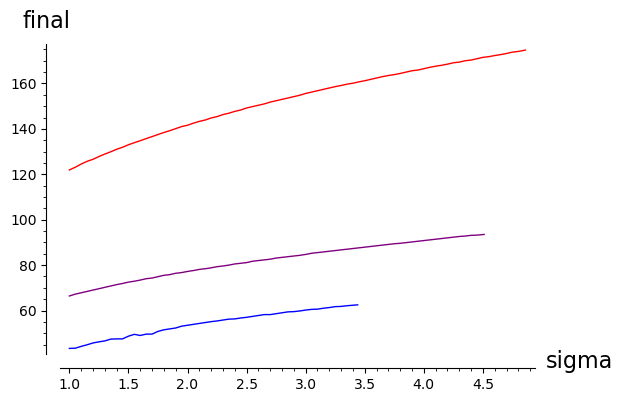

In [17]:
compare_graphs(low_security, med_sec, high_sec, 'sigma', 'final')

In [ ]:
x = create_graph(low_security,'sigma', 'final', 'blue')
y = create_graph(med_sec,'sigma', 'final', 'purple')
z = create_graph(high_sec,'sigma', 'final', 'red')

In [10]:
column_index = [0,1,3,5,6,7,10]

n = 256; q = 7681; stddevlist = (4.51, 4.49,3.47,1.77);
list_x = change_parameters(n,q,stddevlist)
print_table(list_x, true, column_index)

usvp: rop:  ≈2^93.5,  red:  ≈2^93.5,  δ_0: 1.005887,  β:  222,  d:  623,  m:      366
 dec: rop: ≈2^109.2,  m:      383,  red: ≈2^109.2,  δ_0: 1.005545,  β:  244,  d:  639,  babai:  ≈2^94.4,  babai_op: ≈2^109.5,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^109.6,  m:      414,  red: ≈2^109.6,  δ_0: 1.005118,  β:  276,  repeat:  ≈2^71.4,  d:  670,  c:        1
usvp: rop:  ≈2^93.5,  red:  ≈2^93.5,  δ_0: 1.005887,  β:  222,  d:  605,  m:      348
 dec: rop: ≈2^109.0,  m:      382,  red: ≈2^109.0,  δ_0: 1.005501,  β:  247,  d:  638,  babai:  ≈2^94.4,  babai_op: ≈2^109.5,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^109.6,  m:      413,  red: ≈2^109.6,  δ_0: 1.005125,  β:  276,  repeat:  ≈2^71.4,  d:  669,  c:        1
usvp: rop:  ≈2^87.8,  red:  ≈2^87.8,  δ_0: 1.006225,  β:  203,  d:  575,  m:      318
 dec: rop: ≈2^101.1,  m:      366,  red: ≈2^101.1,  δ_0: 1.005923,  β:  220,  d:  622,  babai:  ≈2^86.8,  babai_op: ≈2^101.9,  repeat:      293,  ε: 0.015625
dual: rop: ≈2^103.1,  m:      

\begin{tabular}{lllllll}
n & q & sigma & usvp & dec & dual & final \\ \hline
$256$ & $7681$ & $4.51000000000000$ & 93.5 & 109.2 & 109.6 & $93.5$ \\
$256$ & $7681$ & $4.49000000000000$ & 93.5 & 109.0 & 109.6 & $93.5$ \\
$256$ & $7681$ & $3.47000000000000$ & 87.8 & 101.1 & 103.1 & $87.8$ \\
$256$ & $7681$ & $1.77000000000000$ & 75.2 & 84.7 & 87.4 & $75.2$ \\
\end{tabular}

In [11]:
column_index = [0,1,3,5,6,7,10]

n = 256; q = 4093; stddevlist = (3.33, 3.05,1.73);
list_x = change_parameters(n,q,stddevlist)
print_table(list_x, true, column_index)

usvp: rop:  ≈2^95.2,  red:  ≈2^95.2,  δ_0: 1.005788,  β:  228,  d:  580,  m:      323
 dec: rop: ≈2^111.5,  m:      369,  red: ≈2^111.5,  δ_0: 1.005430,  β:  252,  d:  625,  babai:  ≈2^97.0,  babai_op: ≈2^112.1,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^112.3,  m:      395,  red: ≈2^112.3,  δ_0: 1.005041,  β:  283,  repeat:  ≈2^76.0,  d:  651,  c:        1
usvp: rop:  ≈2^92.9,  red:  ≈2^92.9,  δ_0: 1.005920,  β:  220,  d:  600,  m:      343
 dec: rop: ≈2^108.5,  m:      360,  red: ≈2^108.5,  δ_0: 1.005576,  β:  242,  d:  616,  babai:  ≈2^94.4,  babai_op: ≈2^109.5,  repeat:      588,  ε: 0.007812
dual: rop: ≈2^109.5,  m:      389,  red: ≈2^109.5,  δ_0: 1.005127,  β:  276,  repeat:  ≈2^71.4,  d:  645,  c:        1
usvp: rop:  ≈2^80.8,  red:  ≈2^80.8,  δ_0: 1.006722,  β:  179,  d:  543,  m:      286
 dec: rop:  ≈2^92.3,  m:      320,  red:  ≈2^92.3,  δ_0: 1.006344,  β:  197,  d:  576,  babai:  ≈2^77.6,  babai_op:  ≈2^92.7,  repeat:       72,  ε: 0.062500
dual: rop: ≈2^101.8,  m:      

\begin{tabular}{lllllll}
n & q & sigma & usvp & dec & dual & final \\ \hline
$256$ & $4093$ & $3.33000000000000$ & 95.2 & 111.5 & 112.3 & $95.2$ \\
$256$ & $4093$ & $3.05000000000000$ & 92.9 & 108.5 & 109.5 & $92.9$ \\
$256$ & $4093$ & $1.73000000000000$ & 80.8 & 92.3 & 101.8 & $80.8$ \\
\end{tabular}